# 랜덤 포레스트
- 랜덤한 결정 트리(Decision Tree)를 여러개 묶은 모델
- 트리 < 데이터(부트스트랩(*중복이 될 수 있음))

In [1]:
#119
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names # 2진 분류 classification

array(['malignant', 'benign'], dtype='<U9')

## 결정 트리 vs 랜덤 포래스트 성능 비교

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [7]:
dt = DecisionTreeClassifier().fit(X_train,y_train)
dt.score(X_test, y_test)

0.8881118881118881

In [24]:
rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)  # 부트스트랩 : 데이터가 중복으로 뽑힘
# 성능 좋고, overfitting이 안됨. 단점은 tree모델이라 컬럼이 많으면 잘 안됨. 0이 많으면 잘안됨.
# n_estimators 을 최대한 많이 할 수록 좋음
rf.score(X_test, y_test)   # n_estimators=10 => 0.965034965034965   , n_estimators=100 => 실행할 때마다 변경됨.

0.972027972027972

In [15]:
dt.feature_importances_

array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.0080277 , 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.01204155, 0.        ,
       0.04058449, 0.0520085 , 0.        , 0.07315114, 0.        ,
       0.00975173, 0.03441914, 0.        , 0.01505194, 0.        ])

In [25]:
rf.feature_importances_

array([0.03482145, 0.01465714, 0.05805853, 0.03994443, 0.00650526,
       0.0106961 , 0.06081682, 0.12970815, 0.00486058, 0.00389365,
       0.01871102, 0.00538363, 0.0128833 , 0.04011629, 0.00325017,
       0.0050769 , 0.00693494, 0.00576983, 0.00419334, 0.00576929,
       0.10607657, 0.0161035 , 0.11113549, 0.09277886, 0.01288396,
       0.01800539, 0.03153464, 0.12208306, 0.01041083, 0.00693686])

In [18]:
import matplotlib.pyplot as plt

<BarContainer object of 30 artists>

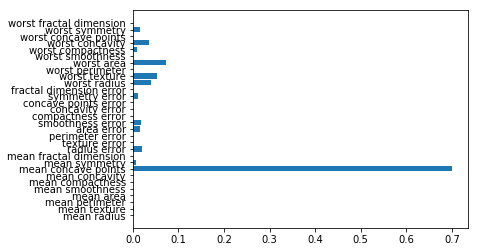

In [19]:
plt.barh(cancer.feature_names, dt.feature_importances_)

<BarContainer object of 30 artists>

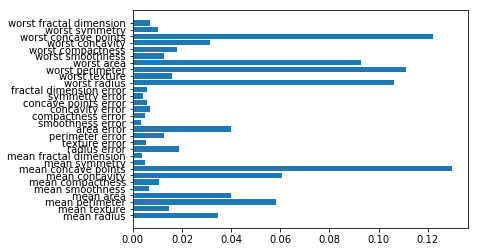

In [26]:
plt.barh(cancer.feature_names, rf.feature_importances_)

# 그래디언트 부스팅(Gradient Boosting)
- 트리 앙상블
- 랜덤포레스트 : 여러 나무가 서로 다른 데이트로 독립적으로 학습(병렬 가능)
- 그래디언트 부스팅 회귀 트리 : 나무 하나씩 순차적으로 학습, 이전 나무의 오류를 최소화하는 방향으로 학습
- 이전 오차를 최소화 하는 방향으로 다음 나무 생성하여 학습함
  - 작은 나무 : 1~5개
     - 나무가 작다(max_depth가 작고, leaf 가 적다) => 성능이 떨어짐. => 약한 학습기(weak learner)
- 보통 안정적인 랜덤 포레스트 먼저 사용하고 더 성능을 놓이고자 할 때 그래디언트 부스팅, xgboost을 사용
- 단점 : 매개변수 조정이 어렵다. 훈련 시간이 길다. 

In [27]:
#p 122
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [31]:
gbc.score(X_train,y_train), gbc.score(X_test,y_test) # 과적합

(1.0, 0.958041958041958)

- 과적합 -> 트리를 작게 만들자 -> 가지치기(사전/사후 가지치기)
- 사전가지치기는 미리 자르기, 사후가지치기는 나무를 다 만들고 leaf를 없앰

In [32]:
gbc = GradientBoostingClassifier(random_state=0,max_depth=1).fit(X_train, y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test) 

(0.9906103286384976, 0.972027972027972)

In [33]:
gbc = GradientBoostingClassifier(random_state=0,max_depth=2).fit(X_train, y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test) 

(1.0, 0.972027972027972)

<BarContainer object of 30 artists>

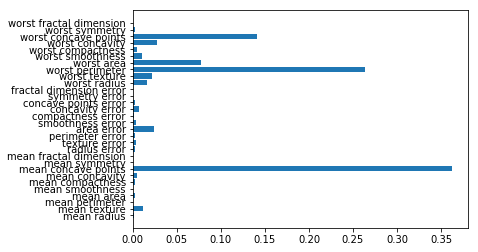

In [34]:
plt.barh(cancer.feature_names, gbc.feature_importances_)

### p131 에이다부스트(AdaBoost) : Adaptive Boosting
- 그라디언트 부스트 트리와 비슷
- 차이 

      - GB : 이전 트리의 오차를 최소화
      - AB : 이전 트리의 오차 샘플에 가중치를 높여서 다음 트리에서 학습
- 결정 트리 -> 과적합 -> 앙상블(랜덤 포레스트, 그라디언트 부스팅 or 에이다부스트)
- 최종결정 : 분류 작업일 경우는 투표(다수결), 예측일 때는 평균

In [35]:
# p132
from sklearn.ensemble import AdaBoostClassifier

In [36]:
adc = AdaBoostClassifier(random_state=0).fit(X_train,y_train)
adc.score(X_train,y_train), adc.score(X_test,y_test) 

(1.0, 0.9790209790209791)

<BarContainer object of 30 artists>

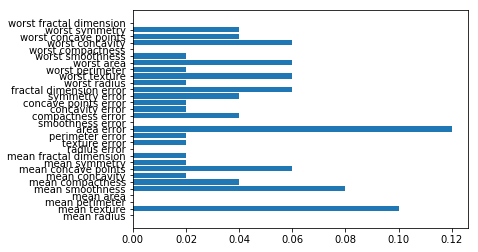

In [37]:
# 특성 중요도
plt.barh(cancer.feature_names, adc.feature_importances_)

## 134 SVM(Support vector machine)
- 139 학습 : 일부 데이터 포인트(샘플)가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다.
- 

In [39]:
# p139
from sklearn.svm import SVC, SVR # SCM-C분류용, SVM-R회귀용
import mglearn

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


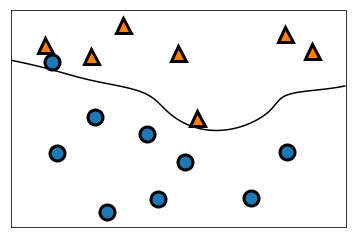

In [52]:
# 140
g = 1  # gamma : 하나의 샘플이 미치는 영향의 범위, 작으면 넓은 범위(많은 샘플:일반화)
c = 1  # 규제 regularization : 파라미터 값이 작아지도록 규제(다양한 특징 :일반화)
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=c, gamma=g).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

In [54]:
sv = SVC(gamma='auto').fit(X_train,y_train)
sv.score(X_train,y_train), sv.score(X_test,y_test) 
# 값을 정규화하면 95%까지 상승, C를 올리면 97%까지 상승

(1.0, 0.6293706293706294)

In [55]:
import os
os.environ["PATH"] += os.pathsep + 'C:/program Files (x86)/Graphviz2.38/bin/'

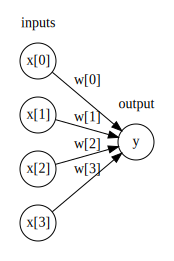

In [56]:
#logistic_regression
display(mglearn.plots.plot_logistic_regression_graph())  

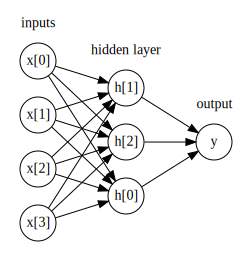

In [57]:
# 신경망(neural network) : 다층 퍼셉트론(multilayer perceptrons)
display(mglearn.plots.plot_single_hidden_layer_graph())

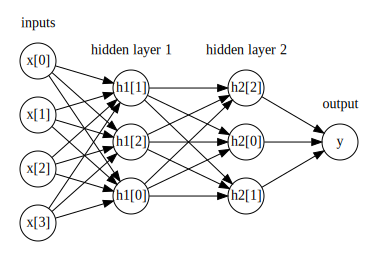

In [58]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 히든 레이어가 없으면 Linear/Logistic regression
# 히든 레이어가 1~3면 신경만(MLP)
# 2000년 이후 히든 레이어가 10~100~1000 개까지 많아진 모델을 딥 뉴럴 네트워크라고 함.

In [61]:
# p151
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier().fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test)  # 과소적합 : under fitting : 성능이 안나온다.

(0.9389671361502347, 0.9370629370629371)

In [63]:
#(3,3) 히든레이어 2개에 각각 노드 3개씩
mlp = MLPClassifier(hidden_layer_sizes=(100,50,20)).fit(X_train,y_train)
mlp.score(X_train,y_train), mlp.score(X_test,y_test) 
# 장점 : 모델 형태를 내 마음대로 설계, 성능은 좋은(good)
# 단점 : 어떤 형태가 최선인지 모름. 학습 속도가 느리고, 분석이 까다롭다.

(0.92018779342723, 0.9300699300699301)

- KNN(예측/분류), Linear Regression(예측), Logistic Regression(분류)
- Decision Tree(예측/분류), Random Forest, Gradient Boost Decision Tree, AdaBoot,
- SVM(SVM-C분류용/SVM-R예측용), MLP(뉴럴네트워크)